<h1><center>Titanic Classification of Survivor</center></h1>

<img src='img/Titanic.jpg'>

## Contents

- EDA
- Preprocessing
- Feature select
- Modeling
- Submission

In [1]:
from function import *

# load data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

---

## 1. EDA

### 1.1 Overall information

In [2]:
# check shape
print('train shape :', train.shape)
print('test shape :', test.shape)

train shape : (891, 12)
test shape : (418, 11)


#### comments :

- train : 총 891개 데이터, 12개 컬럼으로 구성 (y포함)
- test : 총 418개 데이터, 11개 컬럼으로 구성

In [3]:
# information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.6+ KB


In [4]:
# check null
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### comments :

- Age 결측치 : 177개
- Cabin 결측치 : 687개
- Embarked 결측치 : 2개

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.362205
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.636157
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [6]:
# Unique
print('train unique 갯수')
for i in range(12):
    print('{} : {}개'.format(train.columns[i], len(set(train[train.columns[i]]))))

train unique 갯수
PassengerId : 891개
Survived : 2개
Pclass : 3개
Name : 891개
Sex : 2개
Age : 265개
SibSp : 7개
Parch : 7개
Ticket : 681개
Fare : 248개
Cabin : 148개
Embarked : 5개


#### commnets :

- PassengerId, Name는 고유값
- Pclass(3), Sex(2), SibSp(7), Parch(7), Embarked(2)는 카테고리형
- Ticket, Cabin은 카테고리같긴한데 너무 분류가 많음
- Age, Fare는 연속형
- Survived(y값)은 2개로 구성

### 1.2 Y data

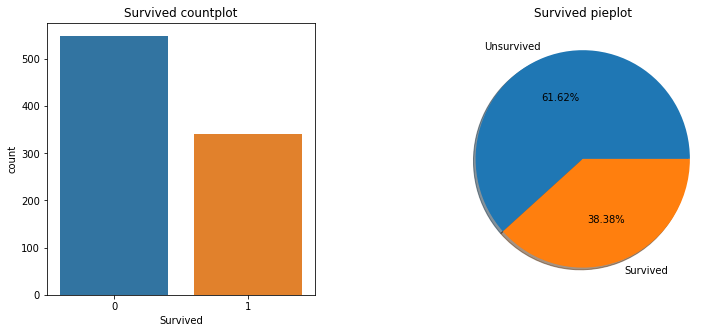

In [7]:
# y_data
plt.figure(figsize=(12, 5))
subplots_adjust(wspace = 0.5)


df = pd.DataFrame([len(train[train['Survived'] == 0])/len(train), 
                   len(train[train['Survived'] == 1])/len(train)], 
                   index=['Unsurvived', 'Survived'], columns=['x'])

# countplot
plt.subplot(1, 2, 1)
sns.countplot(x = 'Survived', data = train)
plt.title('Survived countplot')
labels = 'Unsurvived', 'Survived'

# pieplot
plt.subplot(1, 2, 2)
plt.pie(df, labels = labels, autopct='%1.2f%%', shadow = True, explode = (0.0, 0.0))
plt.title('Survived pieplot')

plt.show()

### 1.3 X & Y data

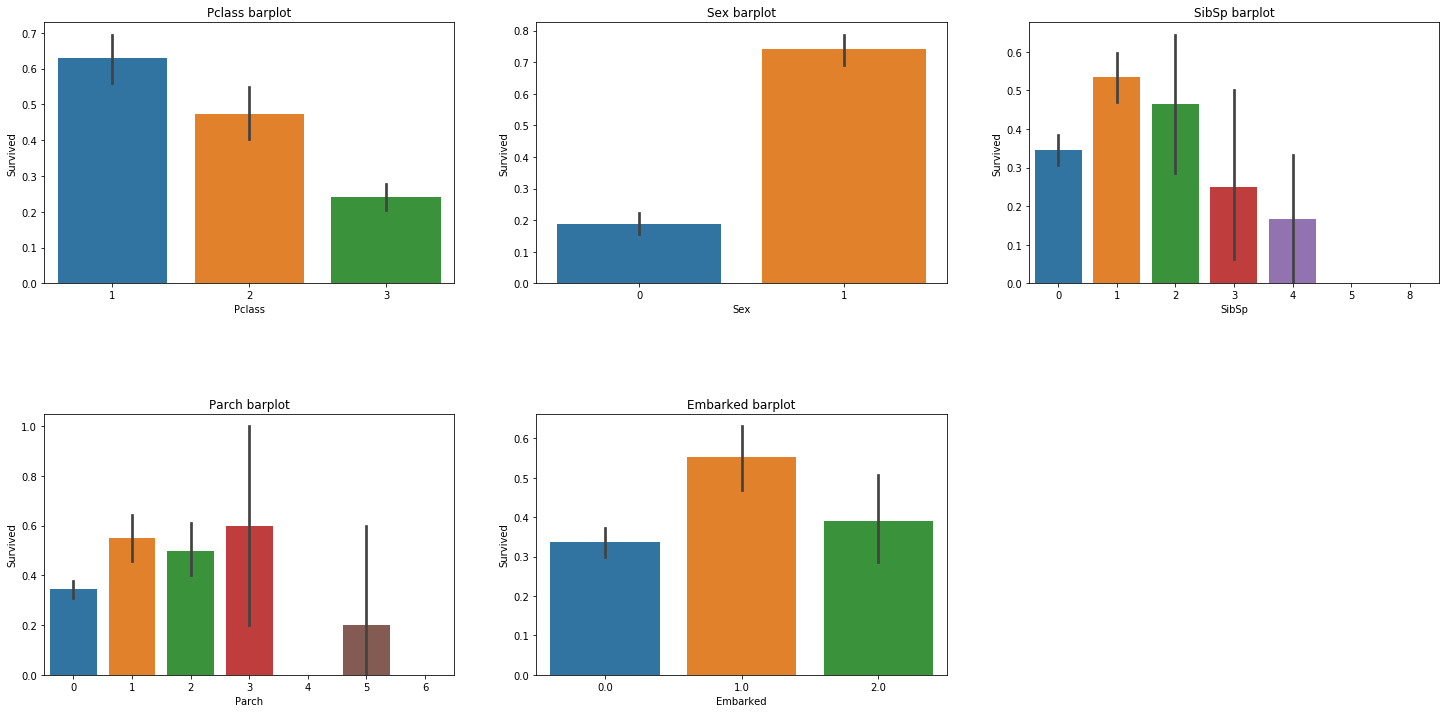

In [8]:
# category barplot
category = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

plt.figure(figsize=(25, 12))
subplots_adjust(hspace = 0.5)

for i in range(5):
    plt.subplot(2, 3, i+1)
    sns.barplot(x = train[category[i]], y = train['Survived'])
    plt.title('{} barplot'.format(train[category].columns[i]))

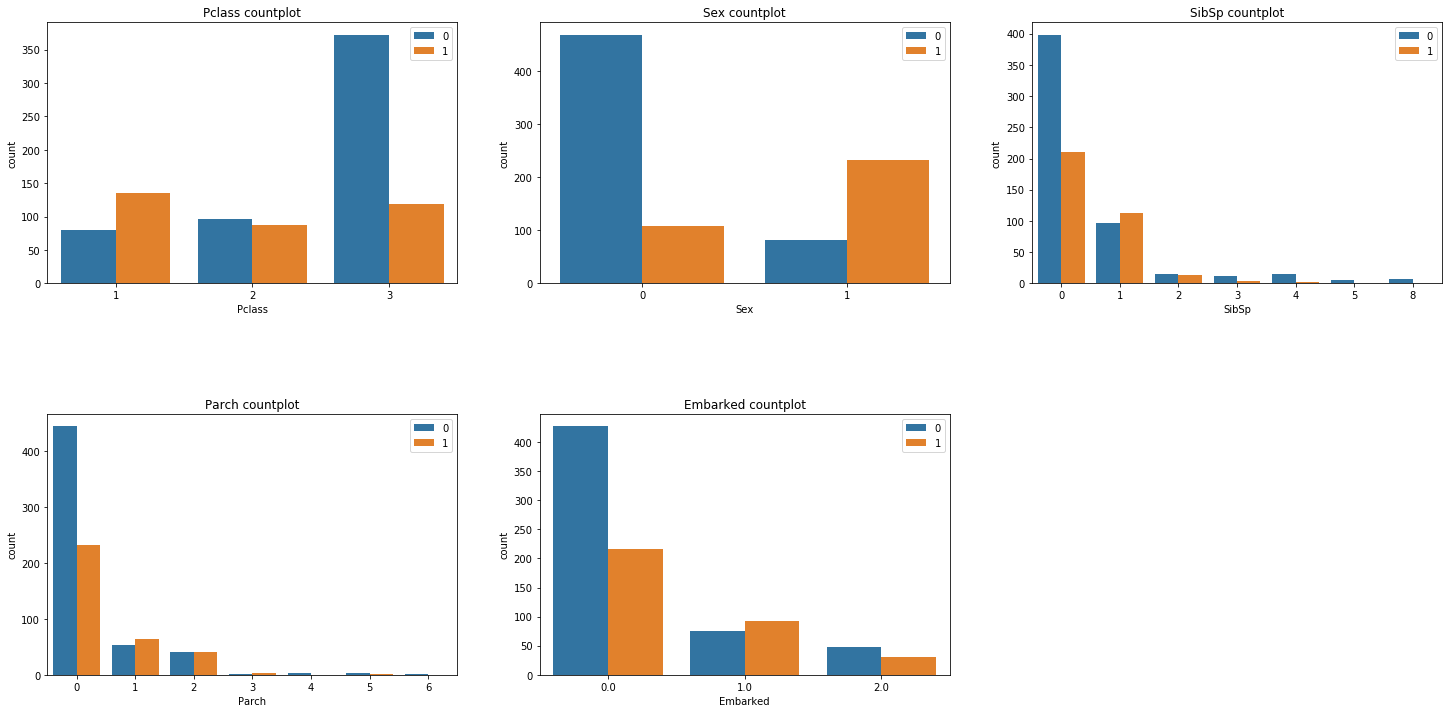

In [9]:
# category countplot
plt.figure(figsize=(25, 12))
subplots_adjust(hspace = 0.5)

for i in range(5):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=train[category[i]], hue = 'Survived',  data = train)
    plt.legend(loc = 1)
    plt.title('{} countplot'.format(train[category].columns[i]))

#### Commnets :

- Pclass의 경우 클래스가 높을수록 생존률이 높은것으로 확인됨
- Sex의 경우 여성이 생존률이 월등히 높음
- SibSp의 경우 형재자매나 배우자의 수가 1명일 경우가 제일 생존률이 높음
- Parch는 1,2,3이 비슷함
- Embarked는 C구역에서 승선할 경우 생존률이 높음

In [10]:
# cabin
cabin = train.groupby("Cabin").size().reset_index(name='counts')
cabin = cabin.sort_values(by=['counts'], ascending=False)
cabin = cabin.reset_index(drop=True)
cabin.head(10)

,Cabin,counts
0,C23 C25 C27,4
1,G6,4
2,B96 B98,4
3,F2,3
4,C22 C26,3
5,E101,3
6,F33,3
7,D,3
8,C78,2
9,B57 B59 B63 B66,2


#### comments :

- 카테고리 갯수가 많고 그 수가 차이가 별로 없어서 분류에 적합한 컬럼인지 고민할 필요가 있음

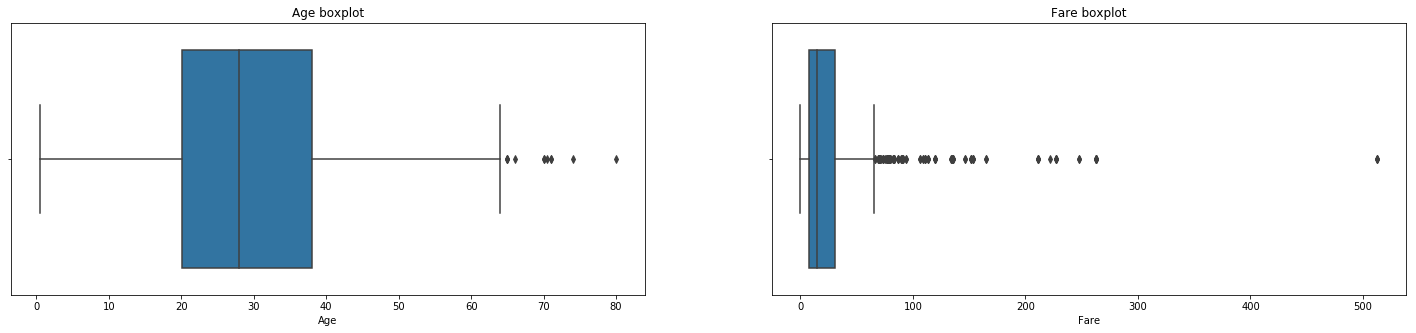

In [11]:
# continuos boxplot
continuos = ['Age', 'Fare']

plt.figure(figsize=(25, 5))

for i in range(2):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x = train[continuos[i]])
    plt.title('{} boxplot'.format(train[continuos].columns[i]))

#### comments :

- age는 약 68세 이상부터 이상치를 나타냄
- fare는 편차가 많아 어느정도 이상치를 제거해야할것으로 보임

---

## 2. Preprocessing

### 2.1 Missing data

In [12]:
# age는 mean값으로 채우기
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

# embarked는 최빈값으로 채우기
embarked_mode = train['Embarked'].value_counts().index[0]
train['Embarked'] = train['Embarked'].fillna(embarked_mode)
embarked_mode = test['Embarked'].value_counts().index[0]
test['Embarked'] = test['Embarked'].fillna(embarked_mode)

# Fare는 평균으로 채우기
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

/anaconda3/envs/practice/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/envs/practice/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


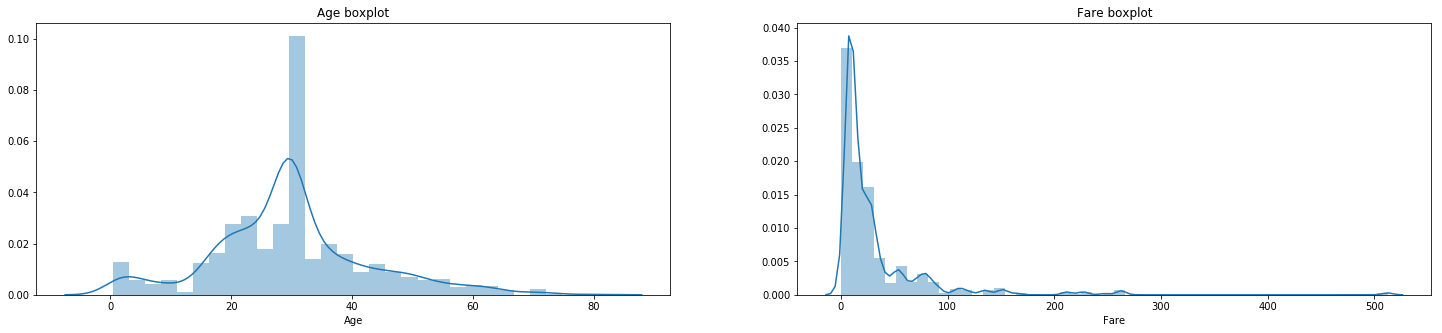

In [13]:
# continuos boxplot
continuos = ['Age', 'Fare']

plt.figure(figsize=(25, 5))

for i in range(2):
    plt.subplot(1, 2, i+1)
    sns.distplot(train[continuos[i]])
    plt.title('{} boxplot'.format(train[continuos].columns[i]))

### 2.2 Change object columns

---

## 3. Feature Select

### 3.1 Correlation

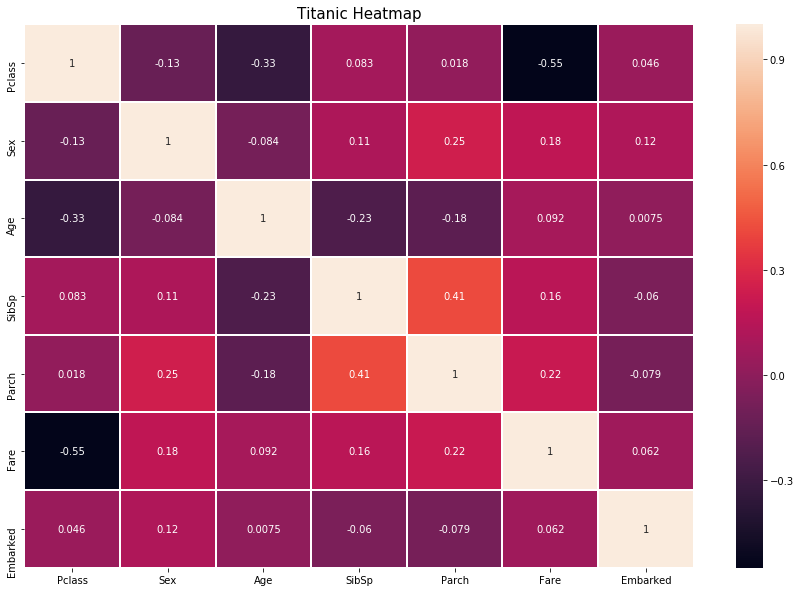

In [14]:
# correlation
correlation = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation.corr(), annot=True, linewidths=1)
plt.title('Titanic Heatmap', fontsize = 15)
plt.show()

#### commnets :

- 변수간의 상관관계가 낮음

### 3.2 VIF

In [15]:
train_vif = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis = 1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_vif.values, i) for i in range(train_vif.shape[1])]
vif["features"] = train_vif.columns
vif

,VIF Factor,features
0,4.023796,Pclass
1,1.652765,Sex
2,3.973402,Age
3,1.563072,SibSp
4,1.630515,Parch
5,1.769321,Fare
6,1.391099,Embarked


#### comments :

- 다중공선성은 없는것으로 확인됨

---

## 4. Modeling

### 4.1 One-Hot-Encoding

In [16]:
y = train['Survived']
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis = 1)
submission_id = test['PassengerId']
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [17]:
# one-hot encoding

# pclass
pclass = pd.get_dummies(train.Pclass)
pclass.rename(columns={1: 'pclass1', 2: 'pclass2', 3: 'pclass3'}, inplace=True)
train = pd.concat([train, pclass], axis=1)
train = train.drop(['Pclass'], axis=1)

# sibsp
sibsp = pd.get_dummies(train.SibSp)
sibsp.rename(columns={0: 'sibsp0', 1: 'sibsp1', 2: 'sibsp2', 3: 'sibsp3', 4: 'sibsp4', 5: 'sibsp5', 8:'sibsp8'}, inplace=True)
train = pd.concat([train, sibsp], axis=1)
train = train.drop(['SibSp'], axis=1)

# parch
parch = pd.get_dummies(train.Parch)
parch.rename(columns={0: 'parch0', 1: 'parch1', 2: 'parch2', 3: 'parch3', 4: 'parch4', 5: 'parch5', 6:'parch6'}, inplace=True)
train = pd.concat([train, parch], axis=1)
train = train.drop(['Parch'], axis=1)

# embarked
embarked = pd.get_dummies(train.Embarked)
embarked.rename(columns={0: 'embarked0', 1: 'embarked1', 2: 'embarked2'}, inplace=True)
train = pd.concat([train, embarked], axis=1)
train = train.drop(['Embarked'], axis=1)

In [18]:
# one-hot encoding

# pclass
pclass = pd.get_dummies(test.Pclass)
pclass.rename(columns={1: 'pclass1', 2: 'pclass2', 3: 'pclass3'}, inplace=True)
test = pd.concat([test, pclass], axis=1)
test = test.drop(['Pclass'], axis=1)

# sibsp
sibsp = pd.get_dummies(test.SibSp)
sibsp.rename(columns={0: 'sibsp0', 1: 'sibsp1', 2: 'sibsp2', 3: 'sibsp3', 4: 'sibsp4', 5: 'sibsp5', 8:'sibsp8'}, inplace=True)
test = pd.concat([test, sibsp], axis=1)
test = test.drop(['SibSp'], axis=1)

# parch
parch = pd.get_dummies(test.Parch)
parch.rename(columns={0: 'parch0', 1: 'parch1', 2: 'parch2', 3: 'parch3', 4: 'parch4', 5: 'parch5', 6:'parch6'}, inplace=True)
test = pd.concat([test, parch], axis=1)
test = test.drop(['Parch'], axis=1)

# embarked
embarked = pd.get_dummies(test.Embarked)
embarked.rename(columns={0: 'embarked0', 1: 'embarked1', 2: 'embarked2'}, inplace=True)
test = pd.concat([test, embarked], axis=1)
test = test.drop(['Embarked'], axis=1)

test = test.drop([9], axis = 1)

### 4.2 Modeling - Train split

In [19]:
# split data
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)

# XGboost
clf = xgboost.XGBClassifier(n_estimators=1000, max_depth=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('confusion matrix :\n\n', confusion_matrix(y_test, y_pred))
print('\n')
print('classification_report :\n\n', classification_report(y_test, y_pred, target_names=['Unsurvived','Survived']))

confusion matrix :

 [[85 20]
 [18 56]]


classification_report :

              precision    recall  f1-score   support

 Unsurvived       0.83      0.81      0.82       105
   Survived       0.74      0.76      0.75        74

avg / total       0.79      0.79      0.79       179



/anaconda3/envs/practice/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### 4.3 Grid Search

In [20]:
import warnings
warnings.filterwarnings('ignore')

param_grid = [
    {'n_estimators' : [10, 20, 50, 100, 200, 500, 1000], 'max_depth' : [2, 4, 6, 8, 10]}]

model = xgboost.XGBClassifier()
grid_search = GridSearchCV(model, param_grid, cv = 5, return_train_score = True)
grid_search.fit(X_train, y_train)

print('Best Parameter :\n\n', grid_search.best_params_)

Best Parameter :

 {'max_depth': 2, 'n_estimators': 200}


### 4.4 Cross Validation

In [21]:
# validation score
clf1 = xgboost.XGBClassifier(n_estimators=100, max_depth=2)
scores = cross_val_score(clf1, X_train, y_train, cv= 10)
print('Corss Validation Score :\n\n', scores)

Corss Validation Score :

 [0.84722222 0.77777778 0.73611111 0.93055556 0.88732394 0.78873239
 0.77464789 0.73239437 0.78571429 0.92857143]


---

## 5. Submission

In [22]:
clf = xgboost.XGBClassifier(n_estimators=100, max_depth=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(test)

submission = pd.DataFrame(columns = ['PassengerId', 'Survived'])
submission['PassengerId'] = submission_id
submission['Survived'] = y_pred

submission.to_csv('data/xgboost.csv', index = False)

<img src='img/Submission.png'>